### В данном уроке мы выделим еще несколько потенциально важных фичей из изначального датасета и попробуем применить изученные методы отбора признаков к итоговому датасету.

In [159]:
import numpy as np
import pandas as pd

processed_data = pd.read_csv('processed_data.csv', index_col='id')

processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,distance_km
id,,,,,
id2875421,1,930.399753,0,455.0,1.500479
id2377394,0,930.399753,0,663.0,1.807119
id3858529,1,930.399753,0,2124.0,6.392080
id3504673,1,930.399753,0,429.0,1.487155
id2181028,1,930.399753,0,435.0,1.189925


In [160]:
initial_data = pd.read_csv('taxi_dataset.csv')

initial_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N


In [161]:
initial_data.shape[0] == processed_data.shape[0]

True

In [162]:
### Вернем в датасет колонку pickup_datetime

initial_data = initial_data.set_index('id')

processed_data = pd.merge(processed_data, initial_data['pickup_datetime'],
                          left_index=True, right_index=True)

In [163]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,distance_km,pickup_datetime
id,,,,,,
id2875421,1,930.399753,0,455.0,1.500479,2016-03-14 17:24:55
id2377394,0,930.399753,0,663.0,1.807119,2016-06-12 00:43:35
id3858529,1,930.399753,0,2124.0,6.392080,2016-01-19 11:35:24
id3504673,1,930.399753,0,429.0,1.487155,2016-04-06 19:32:31
id2181028,1,930.399753,0,435.0,1.189925,2016-03-26 13:30:55


Напомним, **pickup_datetime** - время начала поездки.

Кажется, что в зависимости от месяца/дня недели/времени суток движение на дорогах может отличаться. Как из-за погодных условий, так и из-за загруженности транспорта. Поэтому, есть подозрение, что будет полезно выделить ряд признаков из колонки **pickup_datetime**. Давайте исследуем зависимость нашей таргетной переменной от указанных факторов.

In [164]:
processed_data['pickup_datetime'] = pd.to_datetime(processed_data['pickup_datetime'])

processed_data['date'] = processed_data.pickup_datetime.dt.date
processed_data['day_of_week'] = processed_data.pickup_datetime.dt.dayofweek
processed_data['hour'] = processed_data.pickup_datetime.dt.hour
processed_data['month'] = processed_data.pickup_datetime.dt.month

In [165]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,distance_km,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,455.0,1.500479,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,663.0,1.807119,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,2124.0,6.392080,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,429.0,1.487155,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,435.0,1.189925,2016-03-26 13:30:55,2016-03-26,5,13,3


In [166]:
import numpy as np
processed_data = processed_data.assign(log_trip_duration = np.log1p(processed_data['trip_duration']))
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,distance_km,pickup_datetime,date,day_of_week,hour,month,log_trip_duration
id,,,,,,,,,,,
id2875421,1,930.399753,0,455.0,1.500479,2016-03-14 17:24:55,2016-03-14,0,17,3,6.122493
id2377394,0,930.399753,0,663.0,1.807119,2016-06-12 00:43:35,2016-06-12,6,0,6,6.498282
id3858529,1,930.399753,0,2124.0,6.392080,2016-01-19 11:35:24,2016-01-19,1,11,1,7.661527
id3504673,1,930.399753,0,429.0,1.487155,2016-04-06 19:32:31,2016-04-06,2,19,4,6.063785
id2181028,1,930.399753,0,435.0,1.189925,2016-03-26 13:30:55,2016-03-26,5,13,3,6.077642


Исследуем, когда и сколько поездок было совершено. 

Начнем с графиков, показывающих количество поездок в зависимости от времени суток/даты и т.д.

Так же полезно сразу показать и среднее значение таргетной переменной.

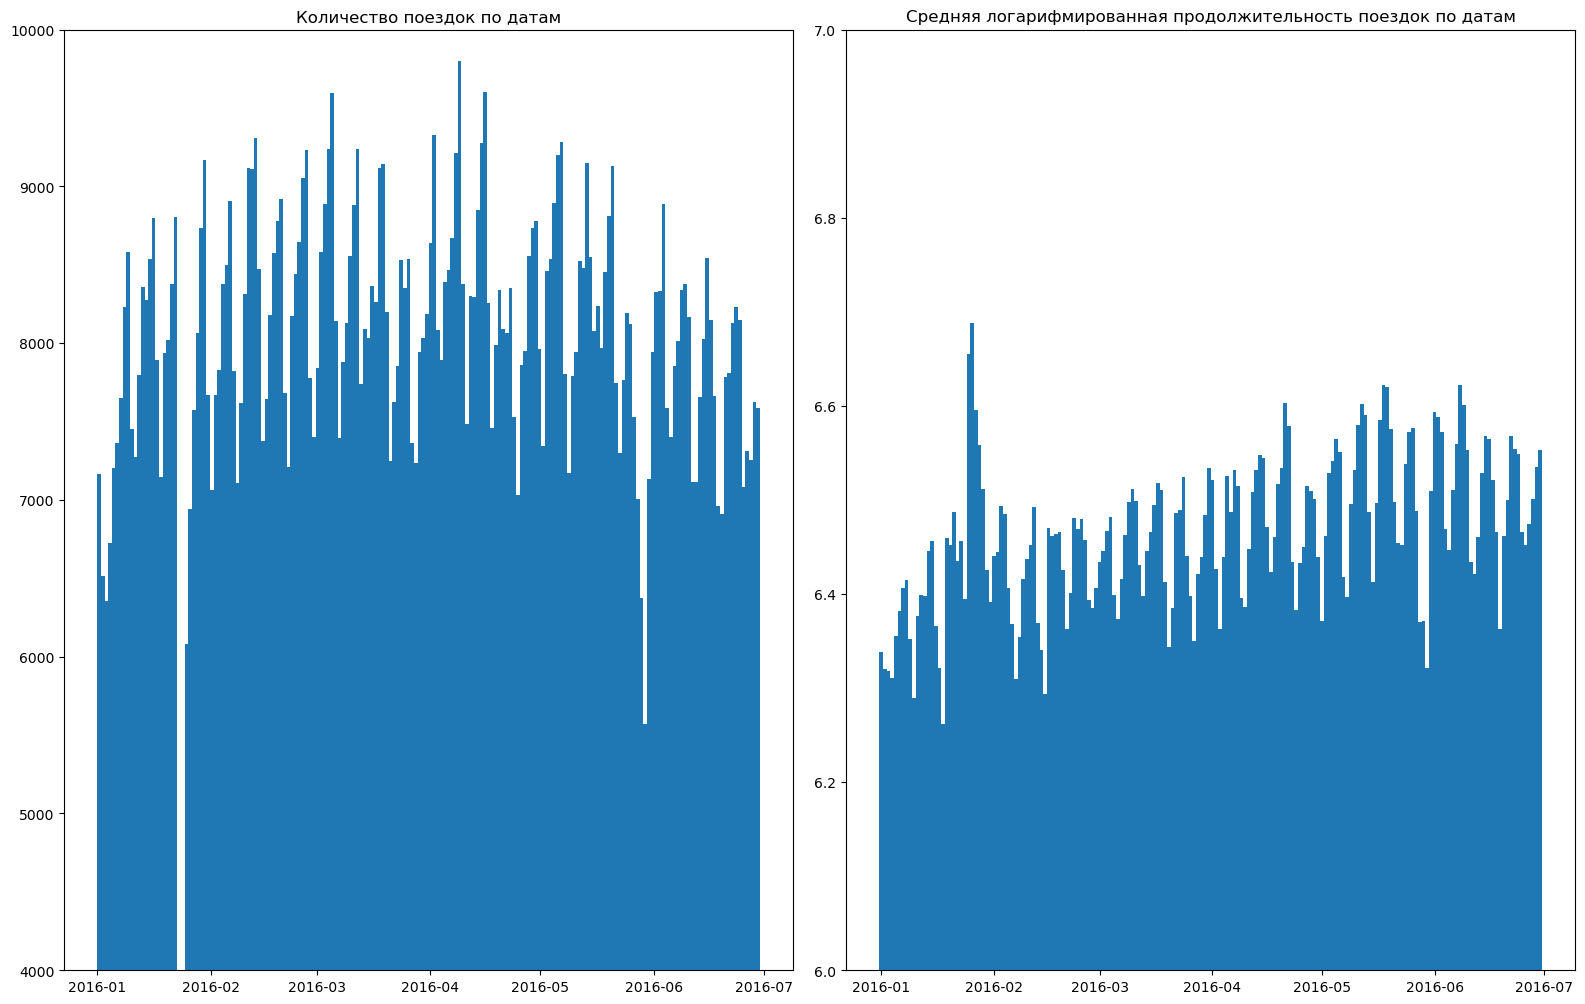

In [167]:
import matplotlib.pyplot as plt

fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['date'], bins=processed_data.date.unique().shape[0])
plt.ylim((4000, 10000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['date'].unique())), 
        processed_data.groupby('date', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по датам')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по датам')

plt.show()

Кажется, что внутри недели есть некоторая зависимость таргета от дня недели. 

Такая же зависимость может оказаться и внутри дня (в завимости от часов).

Предлагаю исследовать эту зависимость подробнее.

Изобразите следующие графики зависимостей:

- Количество поездок/Средняя продолжительность поездки vs День недели
- Количество поездок/Средняя продолжительность поездки vs время суток
- Средняя продолжительность поездки vs время суток для каждого дня недели (например, нарисовав с разными цветами и, соответственно, легендами)
- Аналогичные графики, используя информацию о месяце, внутри которого была совершена поездка.
- Ящики с усами для различных: времени суток, дня недели, месяца

Используйте любые доступные инструменты pyplot!

Далее, на основе полученных результатов, мы будем принимать решение о создании новых признаков.

EDA можно использовать не только для того, чтобы понять, какие фичи можно убрать из датасета. Но и для выделения базовых признаков. Этим и займемся!

P.S. Сами графики мы проверять у Вас не будем. Зато для ответа на устные вопросы понадобятся, поэтому, в любом случае, крайне рекомендуем поупражняться. Поэтому рисовать все графики не обязательно - ограничьтесь теми, которые помогут Вам ответить на тестовые вопросы.

**Hint**: обратите внимание на сильную просадку в январе. Почему она могла произойти - можно прочитать <a href="https://en.wikipedia.org/wiki/January_2016_United_States_blizzard"> здесь</a>. В будущем можно будет создать бинарный признак "произошла ли поездка во время сильного снегопада".


In [126]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,distance_km,pickup_datetime,date,day_of_week,hour,month,log_trip_duration
id,,,,,,,,,,,
id2875421,1,930.399753,0,455.0,1.500479,2016-03-14 17:24:55,2016-03-14,0,17,3,6.122493
id2377394,0,930.399753,0,663.0,1.807119,2016-06-12 00:43:35,2016-06-12,6,0,6,6.498282
id3858529,1,930.399753,0,2124.0,6.392080,2016-01-19 11:35:24,2016-01-19,1,11,1,7.661527
id3504673,1,930.399753,0,429.0,1.487155,2016-04-06 19:32:31,2016-04-06,2,19,4,6.063785
id2181028,1,930.399753,0,435.0,1.189925,2016-03-26 13:30:55,2016-03-26,5,13,3,6.077642


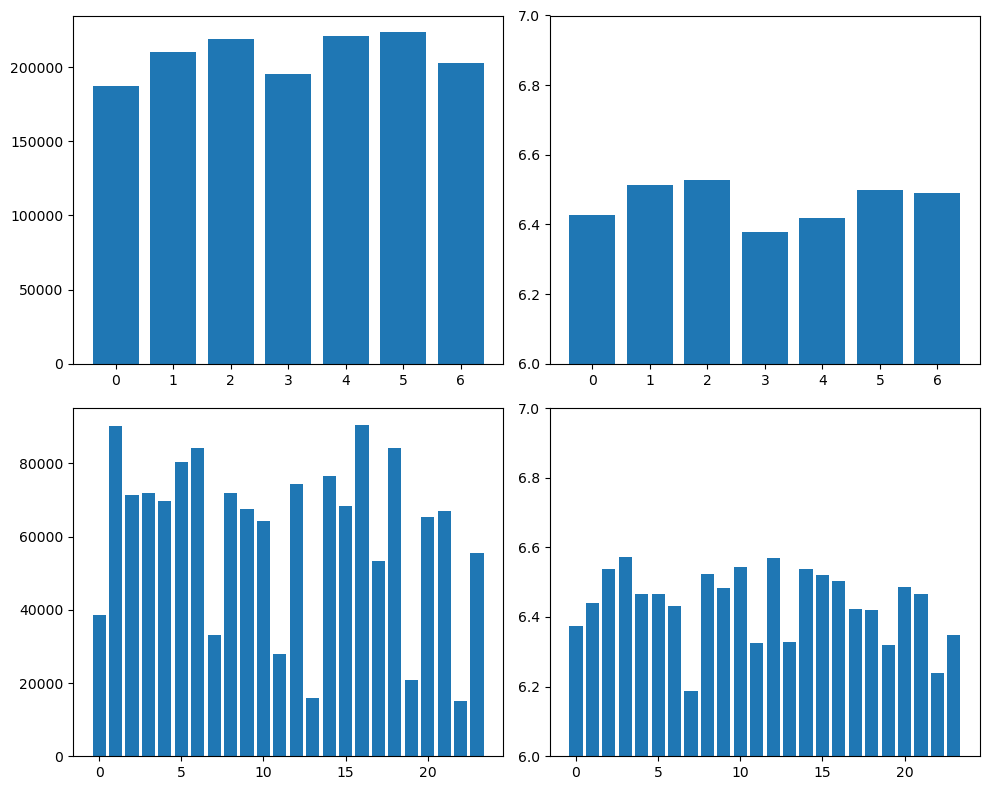

In [50]:
### Your code is here

fig = plt.figure()

fig.set_size_inches(10,8)

ax1 = plt.subplot(2,2,1)
plt.bar(processed_data['day_of_week'].unique(), processed_data.groupby('day_of_week')['day_of_week'].count())

ax2 = plt.subplot(2,2,2)
plt.bar(processed_data['day_of_week'].unique(), processed_data.groupby('day_of_week')['log_trip_duration'].mean())
plt.ylim(6,7)

ax3 = plt.subplot(2,2,3)
plt.bar(processed_data['hour'].unique(), processed_data.groupby('hour')['hour'].count())

ax4 = plt.subplot(2,2,4)
plt.bar(processed_data['hour'].unique(), processed_data.groupby('hour')['log_trip_duration'].mean())
plt.ylim(6,7)

plt.tight_layout()
plt.show()


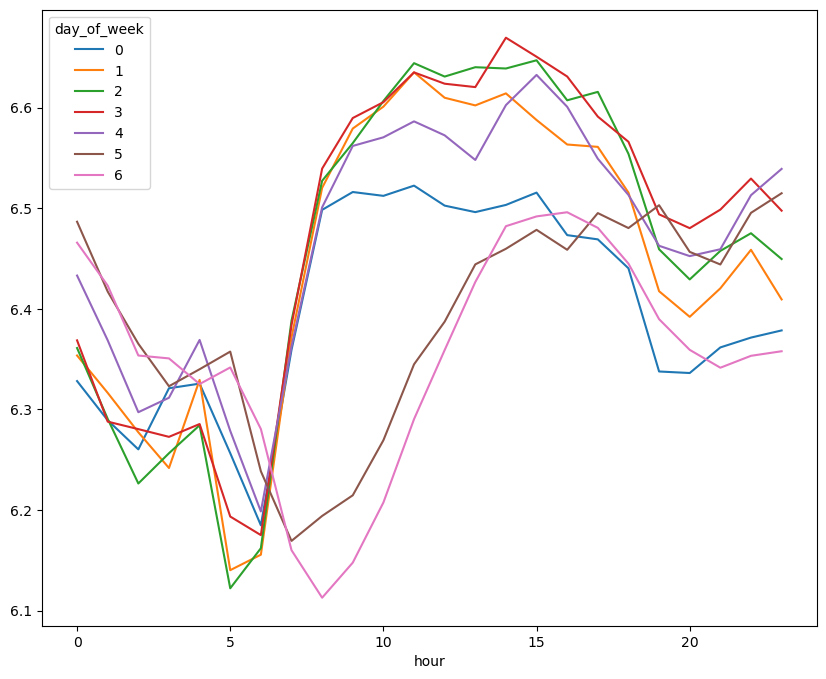

In [56]:
frame = processed_data.groupby(['day_of_week', 'hour'], as_index = False)['log_trip_duration'].mean()
frame = frame.pivot(index = 'hour', columns = 'day_of_week', values = 'log_trip_duration')

frame.plot(figsize = (10,8))
plt.show()

In [58]:
frame.columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
frame.style.background_gradient(cmap = 'RdPu')

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
hour,,,,,,,
0,6.328173,6.353598,6.361024,6.368642,6.433067,6.486600,6.465794
1,6.289221,6.316450,6.290582,6.287852,6.368686,6.417126,6.423073
2,6.260257,6.277271,6.226347,6.280400,6.297224,6.365256,6.353585
3,6.321038,6.241751,6.256435,6.272725,6.311585,6.323040,6.350705
4,6.325626,6.329338,6.284243,6.285450,6.369078,6.339929,6.325216
5,6.256471,6.140184,6.122148,6.193495,6.278671,6.357487,6.341709
6,6.184772,6.155556,6.162004,6.175040,6.198555,6.238505,6.280519
7,6.359147,6.371453,6.388129,6.383752,6.362452,6.169255,6.160052
8,6.498381,6.520274,6.527269,6.539392,6.500891,6.194081,6.112782


Кажется, что полученные выводы из графиков выше достаточны для того, чтобы посчитать признаки, связанные с временем/датой поездки, достаточно важными. На их основе выделим еще пару.

Добавьте следующие бинарные признаки:


1. Была ли в день поездки буря (основываясь на единственном обнаруженном таком дне)
2. Является ли время поездки статистически самым проблемным, то есть час пиком?

Для создания 2ой фичи используйте следующую логику: посчитаем для каждой пары "день недели"-"время суток" среднее значение таргета. Найдем топ-10 самых "больших" пар. Если поездка была совершена во входящее в этот топ время, то ставим 1. Иначе - 0. Получается бинарный признак.

P.S. назовите колонки **anomaly** и **traffic_jam**

In [168]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,distance_km,pickup_datetime,date,day_of_week,hour,month,log_trip_duration
id,,,,,,,,,,,
id2875421,1,930.399753,0,455.0,1.500479,2016-03-14 17:24:55,2016-03-14,0,17,3,6.122493
id2377394,0,930.399753,0,663.0,1.807119,2016-06-12 00:43:35,2016-06-12,6,0,6,6.498282
id3858529,1,930.399753,0,2124.0,6.392080,2016-01-19 11:35:24,2016-01-19,1,11,1,7.661527
id3504673,1,930.399753,0,429.0,1.487155,2016-04-06 19:32:31,2016-04-06,2,19,4,6.063785
id2181028,1,930.399753,0,435.0,1.189925,2016-03-26 13:30:55,2016-03-26,5,13,3,6.077642


In [169]:
### Создадим первый бинарный признак
### Your code is here
processed_data['anomaly'] = (str(processed_data['date']) == '2016-01-23') * 1


In [170]:
### Создадим второй бинарный признак
### Your code is here
top_10_busy_times = processed_data.groupby(['day_of_week', 'hour'])['log_trip_duration'].mean().sort_values(ascending = False).head(10).reset_index()
busy_times = top_10_busy_times[['day_of_week','hour']]
processed_data['traffic_jam'] = processed_data.apply(
    lambda x: (x['day_of_week'], x['hour']) in busy_times.values,
    axis = 1
)


In [171]:
processed_data['traffic_jam']*=1
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,distance_km,pickup_datetime,date,day_of_week,hour,month,log_trip_duration,anomaly,traffic_jam
id,,,,,,,,,,,,,
id2875421,1,930.399753,0,455.0,1.500479,2016-03-14 17:24:55,2016-03-14,0,17,3,6.122493,0,0
id2377394,0,930.399753,0,663.0,1.807119,2016-06-12 00:43:35,2016-06-12,6,0,6,6.498282,0,0
id3858529,1,930.399753,0,2124.0,6.392080,2016-01-19 11:35:24,2016-01-19,1,11,1,7.661527,0,1
id3504673,1,930.399753,0,429.0,1.487155,2016-04-06 19:32:31,2016-04-06,2,19,4,6.063785,0,1
id2181028,1,930.399753,0,435.0,1.189925,2016-03-26 13:30:55,2016-03-26,5,13,3,6.077642,0,1


In [172]:
processed_data.shape

(1458644, 13)

In [173]:
processed_data = processed_data.drop(['trip_duration'], axis = 1)
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,pickup_datetime,date,day_of_week,hour,month,log_trip_duration,anomaly,traffic_jam
id,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,2016-03-14 17:24:55,2016-03-14,0,17,3,6.122493,0,0
id2377394,0,930.399753,0,1.807119,2016-06-12 00:43:35,2016-06-12,6,0,6,6.498282,0,0
id3858529,1,930.399753,0,6.392080,2016-01-19 11:35:24,2016-01-19,1,11,1,7.661527,0,1
id3504673,1,930.399753,0,1.487155,2016-04-06 19:32:31,2016-04-06,2,19,4,6.063785,0,1
id2181028,1,930.399753,0,1.189925,2016-03-26 13:30:55,2016-03-26,5,13,3,6.077642,0,1


Теперь колонки **pickup_datetime**, **date** можно убрать. А про оставшиеся **day_of_week**, **hour**, **month** необходимо подумать:

- С одной стороны, первые две можно убрать, так как на их основе была создана колонка **traffic_jam**
- С другой стороны, зависимость с колонкой **traffic_jam** нелинейная, поэтому можно попробовать использовать все фичи в комбинации. Конечно, лучше попробовать оба варианта и проэкспериментировать, но ради упрощения - оставим все колонки. Хоть **day_of_week**, **hour** и описываются числами, мы понимаем, что это скорее категориальные фичи. Потому что, например, отношение между 23:00 и 00:00 не такое же, как между числами 23 и 0. Закодируем их с помощью OneHotEncoder. 
- Последняя (**month**) очевидно категориальная. Можно закодировать ее тоже через OneHotEncoder.

In [174]:
processed_data_2 = processed_data.drop(['pickup_datetime', 'date'], axis=1)

In [175]:
processed_data_2

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,day_of_week,hour,month,log_trip_duration,anomaly,traffic_jam
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,0,17,3,6.122493,0,0
id2377394,0,930.399753,0,1.807119,6,0,6,6.498282,0,0
id3858529,1,930.399753,0,6.392080,1,11,1,7.661527,0,1
id3504673,1,930.399753,0,1.487155,2,19,4,6.063785,0,1
id2181028,1,930.399753,0,1.189925,5,13,3,6.077642,0,1
...,...,...,...,...,...,...,...,...,...,...
id2376096,1,1053.529749,0,1.226296,4,13,4,6.658011,0,1
id1049543,0,930.399753,0,6.056935,6,7,1,6.486161,0,0
id2304944,1,930.399753,0,7.832952,4,6,4,6.639876,0,1


In [176]:
### Делаем OneHotEncoding и конкатим с processed_data

for col in ['day_of_week', 'hour', 'month']:
    dummies = pd.get_dummies(processed_data_2[col], prefix=col)
    processed_data_2 = pd.concat([processed_data_2, dummies], axis=1)

processed_data_2.shape

(1458644, 47)

In [177]:
processed_data_2 = processed_data_2.drop(['month', 'day_of_week', 'hour'], axis=1)

In [180]:
processed_data_3 = processed_data_2
bool_columns = processed_data_3.select_dtypes(include=['bool']).columns
processed_data_3[bool_columns] *= 1
processed_data_3

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_0,day_of_week_1,day_of_week_2,...,hour_20,hour_21,hour_22,hour_23,month_1,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,930.399753,0,6.392080,7.661527,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id2376096,1,1053.529749,0,1.226296,6.658011,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
id1049543,0,930.399753,0,6.056935,6.486161,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
id2304944,1,930.399753,0,7.832952,6.639876,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [181]:
processed_data_3 = processed_data_3.drop(['day_of_week_0', 'hour_0', 'month_1'], axis = 1)
processed_data_3.head(5).to_csv('first.csv', sep = ',')
processed_data_3.head(5)

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,930.399753,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [182]:
processed_data_3.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,930.399753,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Что же, мы с Вами научились с помощью EDA визуализаций понимать важность признаков не только постфактум, но и до того, как сформировался финальный датасет - на этапе **выделения базовых фичей**.

Обратимся теперь к методам фильтрации - например, применим корреляционный анализ для одной пары фичей, чтобы понять, нет ли относительно этих колонок в нашем датасете избытка информации. 

Вспомним так же изначальные вещественные признаки - distance_km, passenger_count

Посчитайте корреляцию между ними. Есть ли какие-то основания для беспокойства?

In [194]:
### Your code is here
dist_mean = processed_data_3['distance_km'].mean()
pass_mean = processed_data_3['passenger_count'].mean()

numerator = (processed_data_3['distance_km'] - dist_mean)*(processed_data_3['passenger_count'] - pass_mean)
sum1 = np.sum((processed_data_3['distance_km'] - dist_mean)**2)
sum2 = np.sum((processed_data_3['passenger_count'] - pass_mean)**2)
denominator = (sum1*sum2)**(0.5)
print(round(np.sum(numerator)/denominator,3))

0.017


In [200]:
round(processed_data[['passenger_count','distance_km']].corr()['passenger_count']['distance_km'],3)

np.float64(0.017)

In [201]:
processed_data_3.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,930.399753,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [203]:
### На данный момент у нас 41 фича
### Представим, что хочется сократить их количество до 5.
### Воспользуемся для этим каким-нибудь методом обертки
### Например, метод прямого отбора

### Your code is here

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

model = LinearRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select=5)

x = processed_data_3.drop(['log_trip_duration'], axis = 1)
y = processed_data_3['log_trip_duration']

sfs.fit(x,y)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5)

In [204]:
### Перечислите фичи, которые окажутся наиболее желанными
### Your code is here
sfs.get_feature_names_out()

array(['distance_km', 'traffic_jam', 'day_of_week_6', 'hour_5', 'hour_6'],
      dtype=object)

In [206]:
### Представим, что мы с Вами ничего не знаем про Кросс-Валидацию и отложенную выборку
### Замерьте качество линейной регрессии на данных фичах
### Сильно ли оно отличается от полученного на Кросс-Валидации в прошлом уроке в ДЗ?

### Your code is here
my_x = processed_data_3[sfs.get_feature_names_out()]
model.fit(my_x, y)

print(round(np.mean((model.predict(my_x)-y)**2),3))

0.415


In [150]:
df = pd.read_csv('tester.csv')
df

,id,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
0,id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,id3858529,1,930.399753,0,6.392080,7.661527,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,id3504673,1,930.399753,0,1.487155,6.063785,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
